In [1]:
#importing the necessary packages and library
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
%matplotlib inline
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from pandas.plotting import parallel_coordinates, scatter_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
sns.set(rc={'figure.figsize':(12,12)})

In [2]:
warnings.filterwarnings("ignore") # ignore warnings

In [3]:
# load the csv dataset

adult = pd.read_csv('adult.data', sep=",", header = None)
test = pd.read_csv("adult.test", header=None, sep=", ", skiprows=1)

In [4]:
# remove special character ? from the dataset

def removespl(df):
    df["workclass"] = df["workclass"].replace('?',np.nan)
    df["education"] = df["education"].replace('?',np.nan)
    df["marital_status"] = df["marital_status"].replace('?',np.nan)
    df["occupation"] = df["occupation"].replace('?',np.nan)
    df["relationship"] = df["relationship"].replace('?',np.nan)
    df["race"] = df["race"].replace('?',np.nan)
    df["sex"] = df["sex"].replace('?',np.nan)
    df["native_country"] = df["native_country"].replace('?',np.nan)
    df = df.dropna(axis=0,how='any')
    return df

In [5]:
# converting the catogerical variables to numerical variables using LabelEncoder

def Cat2Num(df):    
    df['workclass'] = lb_make.fit_transform(df['workclass'])
    df['marital_status']=lb_make.fit_transform(df['marital_status'])
    df['occupation']=lb_make.fit_transform(df['occupation'])
    df['relationship']=lb_make.fit_transform(df['relationship'])
    df['race']=lb_make.fit_transform(df['race'])
    df['sex']=lb_make.fit_transform(df['sex'])
    df['Salary_class']=lb_make.fit_transform(df['Salary_range'])
    df['native_country']=lb_make.fit_transform(df['native_country'])
    return df

In [6]:
#first 3 rows of the data
adult.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [7]:
# naming the columns
adult.columns =['age', 'workclass', 'fnlwgt', 'education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','Salary_range']
test.columns =['age', 'workclass', 'fnlwgt', 'education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','Salary_range']

In [8]:
#first 3 rows of the data
adult.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Salary_range
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [9]:
# summary of dataset 
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  Salary_range    32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
#summary statistics of dataset
adult.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Here the average is 38,  average education  is highschool( education-number 10) , average hours per week is 40

In [11]:
# data types
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
Salary_range      object
dtype: object

In [12]:
# count of unique values in 'workclass' column.
print(adult['workclass'].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


In [13]:
# count of  unique values in  'marital_status' column.
print(adult['marital_status'].value_counts())

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64


In [14]:
# count of  unique values in  'occupation' column.
print(adult['occupation'].value_counts())

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


In [15]:
# count of  unique values in  'relationship' column.
print(adult['relationship'].value_counts())

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64


In [16]:
# count of  unique values in  'race' column.
print(adult['race'].value_counts())

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64


In [17]:
# count of  unique values in  'sex' column.
print(adult['sex'].value_counts())

 Male      21790
 Female    10771
Name: sex, dtype: int64


In [18]:
# count of  unique values in  'native_country' column.
print(adult['native_country'].value_counts())

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [19]:
# count of  unique values in  'Salary_range' column.
print(adult['Salary_range'].value_counts())

 <=50K    24720
 >50K      7841
Name: Salary_range, dtype: int64


In [20]:
# count of  unique values in  'education' column.
print(adult['education'].value_counts())

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


In [21]:
# count of  unique values in  'education_num' column.
print(adult['education_num'].value_counts())

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64


In [22]:
# checking for null and redundant values

adult = removespl(adult)
test = removespl(test)

## Selecting the best individual features

In [23]:
# converting the catogerical variables to numerical variables using LabelEncoder

lb_make = LabelEncoder()


In [24]:
#converting the different catogerical values to numerical values

df_sklearn = adult.copy()
df_sklearn = Cat2Num(df_sklearn)
tf_sklearn = test.copy()
tf_sklearn = Cat2Num(tf_sklearn)

above_50K = adult[adult["Salary_range"] == " >50K"]
below_50K = adult[adult["Salary_range"] == " <=50K"].sample(n=len(above_50K))

# Due to skewed nature of data, selecting equal number of records from both classes
X1 = df_sklearn[df_sklearn["Salary_class"] == 1]
X2 = df_sklearn[df_sklearn["Salary_class"] == 0].sample(n=len(X1))
consolidated_sklearn = pd.concat([X1, X2])

In [25]:
df_sklearn.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Salary_range,Salary_class
0,39,7,77516,Bachelors,13,4,1,1,4,1,2174,0,40,39,<=50K,0
1,50,6,83311,Bachelors,13,2,4,0,4,1,0,0,13,39,<=50K,0
2,38,4,215646,HS-grad,9,0,6,1,4,1,0,0,40,39,<=50K,0
3,53,4,234721,11th,7,2,6,0,2,1,0,0,40,39,<=50K,0
4,28,4,338409,Bachelors,13,2,10,5,2,0,0,0,40,5,<=50K,0


In [26]:
consolidated_sklearn.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Salary_range,Salary_class
7,52,6,209642,HS-grad,9,2,4,0,4,1,0,0,45,39,>50K,1
8,31,4,45781,Masters,14,4,10,1,4,0,14084,0,50,39,>50K,1
9,42,4,159449,Bachelors,13,2,4,0,4,1,5178,0,40,39,>50K,1
10,37,4,280464,Some-college,10,2,4,0,2,1,0,0,80,39,>50K,1
11,30,7,141297,Bachelors,13,2,10,0,1,1,0,0,40,19,>50K,1


In [27]:
dataset_col =["age","workclass","fnlwgt","education_num","marital_status","occupation","relationship","race","sex", "capital_gain", "capital_loss", "hours_per_week","native_country"]
col =["age","education_num","marital_status", "sex", "capital_gain", "hours_per_week"]

In [28]:
#selection of the features
X = df_sklearn[dataset_col].values
x_test = tf_sklearn[col].values

In [29]:
#create a target class array
y = df_sklearn["Salary_class"].values
y_test = tf_sklearn["Salary_class"].values

In [30]:
#SelectKBest, which returns the k-best-performing features
#create  transformer using the chi2 function and a SelectKBest transformer:
transformer = SelectKBest(score_func=chi2,k=5)

In [31]:
#Running fit_transform will call fit and then transform with the same dataset
Xt_chi2 = transformer.fit_transform(X, y)

In [32]:
print(transformer.scores_)

[8.60061182e+03 4.75081192e+01 1.71147683e+05 2.40142178e+03
 1.12346982e+03 5.04558854e+02 3.65914312e+03 3.30313051e+01
 5.02439419e+02 8.21924671e+07 1.37214589e+06 6.47640900e+03
 1.36192560e+01]


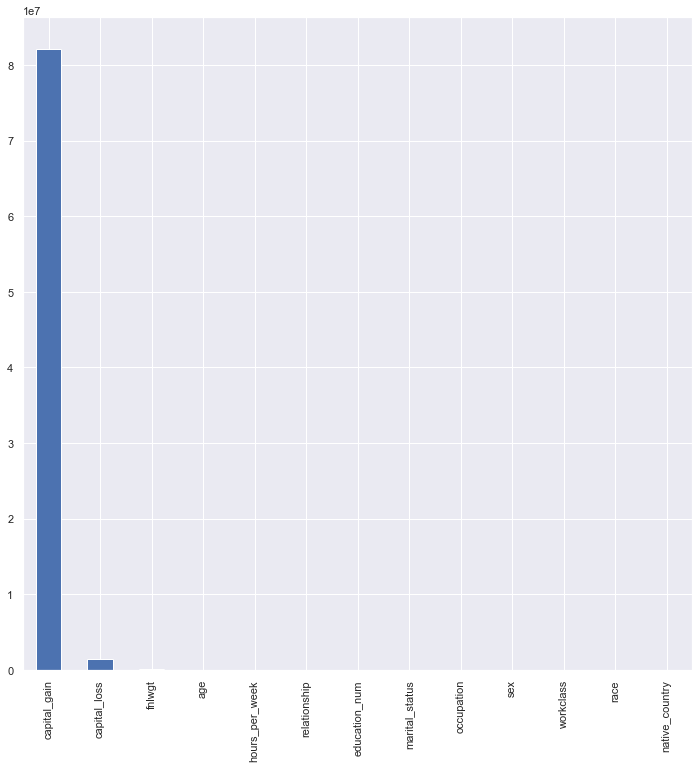

In [33]:
#plotting the features based on the score
p_values = pd.Series(transformer.scores_, index = dataset_col)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar();

The highest values are for the capital gain, capital loss features. This is based on a univariate feature selection

### Using Pearson correlation coefficient

In [34]:
# a wrapper function that allows to use  for multivariate arrays 
def multivariate_pearsonr(X, y):
    scores, pvalues = [], []
    for column in range(X.shape[1]):
        # Compute the Pearson correlation for this column only
        cur_score, cur_p = pearsonr(X[:,column], y)
        # Record both the score and p-value.
        scores.append(abs(cur_score))
        pvalues.append(cur_p)
    return (np.array(scores), np.array(pvalues))

In [35]:
# The Pearson value could be between -1 and 1. A value of 1 implies a perfect correlation between two variables, while a value of -1 implies a perfect negative correlation
# use the transformer class to rank the features using the Pearson correlation coefficient:
transformer = SelectKBest(score_func=multivariate_pearsonr, k=5)
Xt_pearson = transformer.fit_transform(X, y)
print(transformer.scores_)

[0.2340371  0.05160427 0.00946256 0.33515395 0.19930701 0.0754682
 0.25091814 0.07184561 0.21598015 0.22332882 0.15052631 0.22968907
 0.01584026]


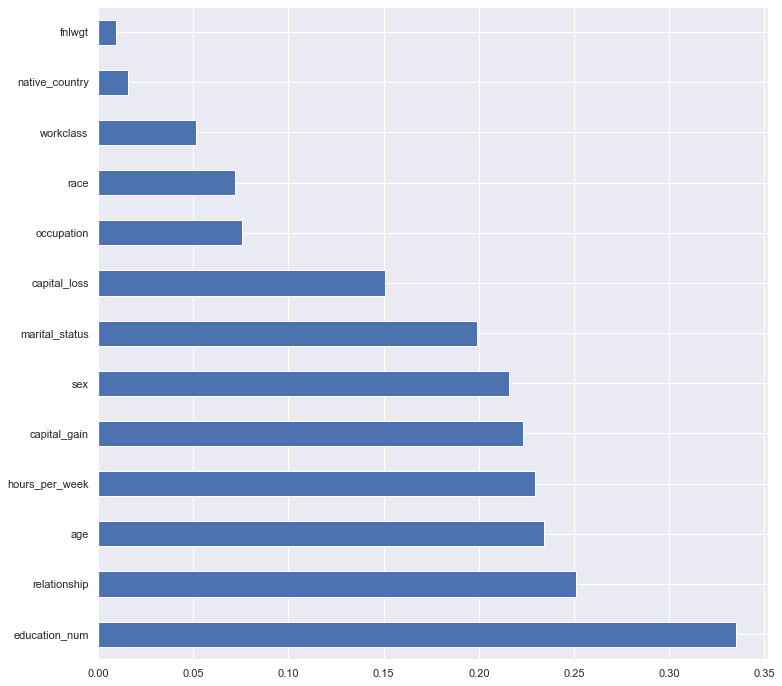

In [36]:
##plotting the features based on the score
k_values = pd.Series(transformer.scores_,index = dataset_col)
k_values.sort_values(ascending = False , inplace = True)
k_values.plot(kind = "barh");

The features chosen this way are education,age,relationship,hours_per_week,capital gain

In [37]:
# Create training set and corresponding class labels

x_train = df_sklearn[col].values
y_train = y

### Using decision trees

In [38]:
dtclf = DecisionTreeClassifier(random_state=9)
#Train our model with the training data
dtclf.fit(x_train, y_train)
#print our price predictions on our test data
y_pred = dtclf.predict(x_test)
#printing the accuracy values 
scores_chi2 = cross_val_score(dtclf, Xt_chi2, y, scoring='accuracy')
scores_pearson = cross_val_score(dtclf, Xt_pearson, y, scoring='accuracy')

print("Chi2 score: {:.3f}".format(scores_chi2.mean()))
print("Pearson score: {:.3f}".format(scores_pearson.mean()))
print("Accuracy: {0:.1f}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Chi2 score: 0.759
Pearson score: 0.822
Accuracy: 82.0%


### Using Logistic Regression

In [39]:
lrclf = LogisticRegression(solver='lbfgs', max_iter=2000)

#Train our model with the training data
lrclf.fit(x_train, y_train)
#print our price predictions on our test data
y_pred = lrclf.predict(x_test)
#printing the accuracy values 
print("Accuracy: {0:.1f}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 81.2%


### K- Nearest Neighbours

In [40]:
knnclf = KNeighborsClassifier(n_neighbors=2)
knnclf.fit(x_train, y_train)
#print our price predictions on our test data
y_pred = knnclf.predict(x_test)
#printing the accuracy values
print("Accuracy: {0:.1f}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 82.3%


### Support Vector Machines

In [41]:
svmclf = svm.SVC()
svmclf.fit(x_train, y_train)
#print our price predictions on our test data
y_pred = svmclf.predict(x_test)
#printing the accuracy values
print("Accuracy: {0:.1f}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 79.5%


### Naive Bayes Classifier

In [42]:
nbclf = GaussianNB()
nbclf.fit(x_train, y_train)
#print our price predictions on our test data
y_pred = nbclf.predict(x_test)
#printing the accuracy values
print("Accuracy: {0:.1f}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 79.0%


### Random Forest

In [43]:
rfclf=RandomForestClassifier(n_estimators=100)
rfclf.fit(x_train, y_train)
#print our price predictions on our test data
y_pred = rfclf.predict(x_test)
#printing the accuracy values
print("Accuracy: {0:.1f}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 83.0%


Using this combination of features, we can achieve 83 percent

## Visualizations

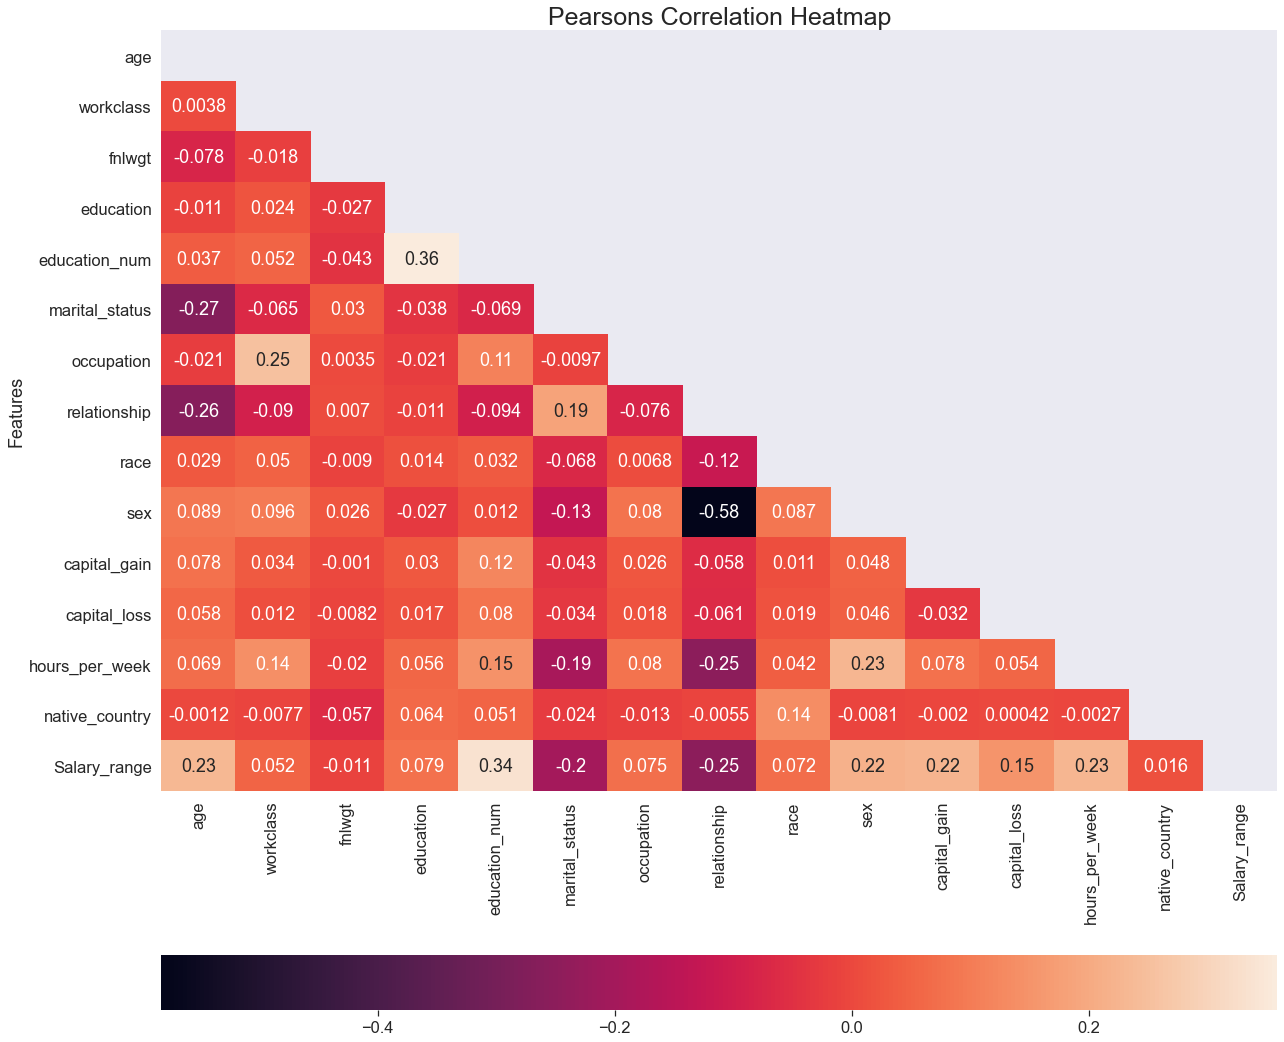

In [44]:
# Correlation HeatMap
df1 = adult.copy()
lb_make = LabelEncoder()
df1['workclass'] = lb_make.fit_transform(df1['workclass'])
df1['education'] = lb_make.fit_transform(df1['education'])
df1['marital_status'] = lb_make.fit_transform(df1['marital_status'])
df1['occupation'] = lb_make.fit_transform(df1['occupation'])
df1['relationship'] = lb_make.fit_transform(df1['relationship'])
df1['race'] = lb_make.fit_transform(df1['race'])
df1['sex'] = lb_make.fit_transform(df1['sex'])
df1['native_country'] = lb_make.fit_transform(df1['native_country'])
df1['Salary_range'] = lb_make.fit_transform(df1['Salary_range'])
df1['fnlwgt'] = lb_make.fit_transform(df1['fnlwgt'])
mask = np.triu(df1.corr())
correlation_mat = df1.corr()
plt.figure(figsize = (20,20))
sns.set(font_scale=1.5)
sns.heatmap(correlation_mat, annot = True, mask = mask, cbar_kws= {'orientation': 'horizontal'})
plt.title("Pearsons Correlation Heatmap",fontsize=25)
plt.ylabel("Features")
plt.savefig("example.png", facecolor = (1,1,1,0))
plt.show()

### Parallel Coordinates Plot

In [45]:
df = df_sklearn[["capital_gain", "age", "hours_per_week", "education_num","Salary_class"]].copy()
df_array = MinMaxScaler().fit_transform(df.values)
df = pd.DataFrame(df_array)
df_sklearn.index = df.index
df['Salary_range'] = df_sklearn['Salary_range']
df.columns = [ "capital_gain", "age", "hours_per_week", "education_num","Salary_class","Salary_range"]
df_below_50K = df[df["Salary_class"] == 0.0].sample(n=100)
df_above_50K = df[df["Salary_class"] == 1.0].sample(n=100)

df = pd.concat([df_below_50K,df_above_50K])

In [46]:
df.head()

,capital_gain,age,hours_per_week,education_num,Salary_class,Salary_range
4764,0.0,0.657534,0.397959,0.933333,0.0,<=50K
17999,0.0,0.136986,0.500000,0.800000,0.0,<=50K
7158,0.0,0.136986,0.397959,0.533333,0.0,<=50K
7907,0.0,0.068493,0.397959,0.600000,0.0,<=50K
1017,0.0,0.465753,0.316327,0.533333,0.0,<=50K


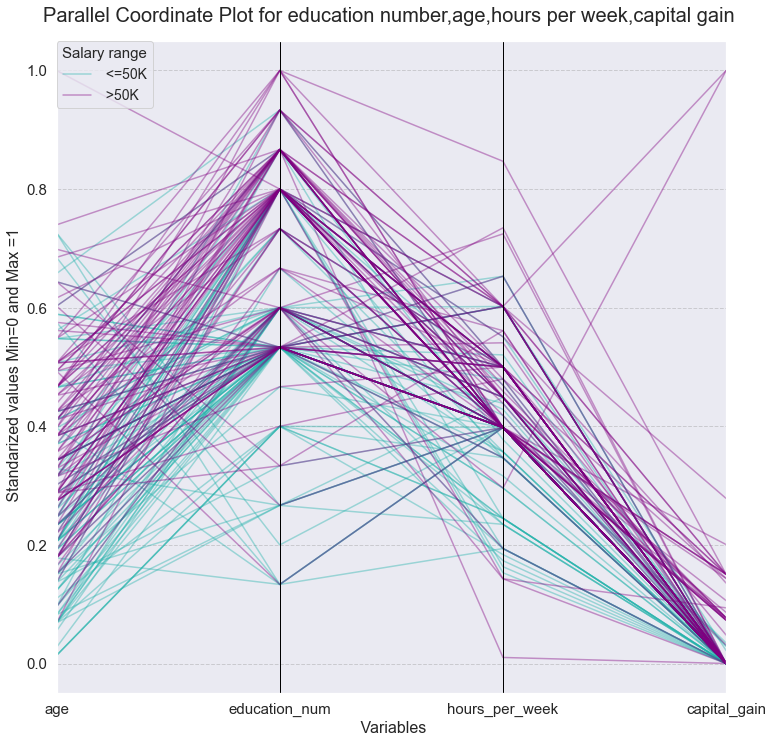

In [47]:
parallel_coordinates(df, "Salary_range", cols=['age','education_num','hours_per_week','capital_gain'],color =('lightseagreen','purple'),alpha =0.4)
plt.gca().legend(title = 'Salary range',title_fontsize= 15,loc=2, borderaxespad=0,prop={"size":14})
plt.title("Parallel Coordinate Plot for education number,age,hours per week,capital gain ",fontsize =20,y=1.02)
plt.ylabel(" Standarized values Min=0 and Max =1",fontsize =16)
plt.grid(True, linestyle='--',color = 'gray',alpha=0.3)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(" Variables",fontsize =16)
plt.show()

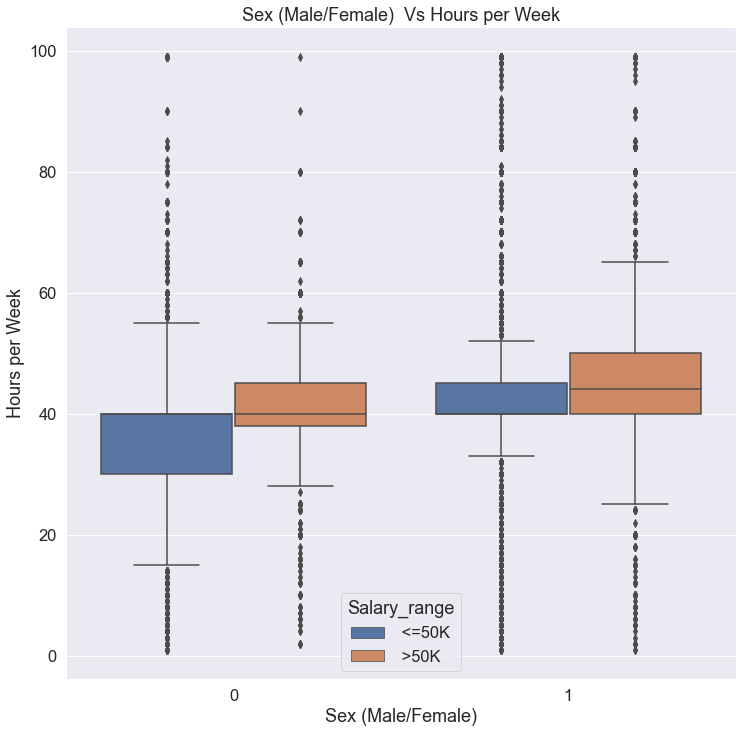

In [48]:
#Box plot for Sex (Male/Female) and Hours per week
sns.boxplot(x='sex', y='hours_per_week',hue ='Salary_range', data=df_sklearn).set(xlabel='Sex (Male/Female)', ylabel='Hours per Week', title = "Sex (Male/Female)  Vs Hours per Week")
plt.show()

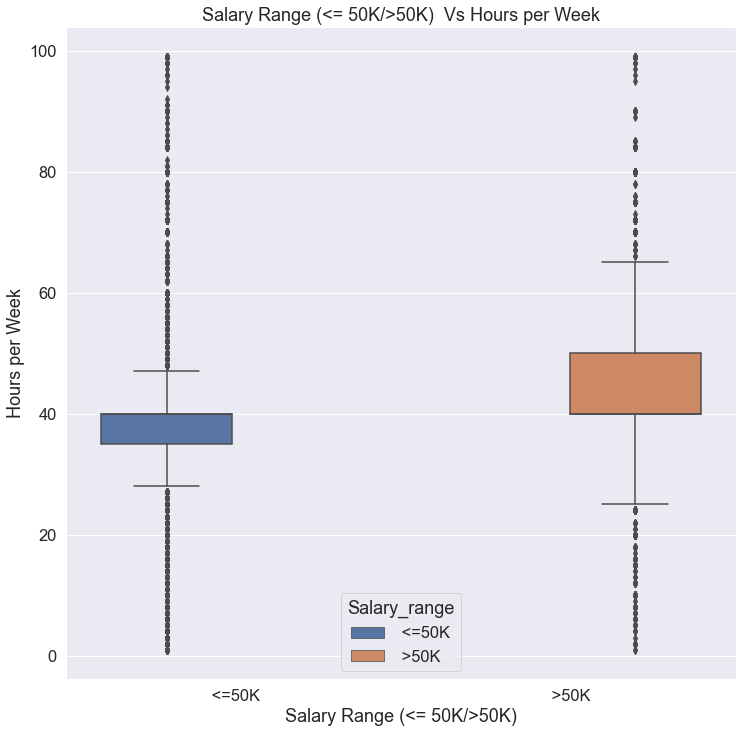

In [49]:
#Box plot for Salary Range (>50K or <= 50K) and Hours per week
sns.boxplot(x='Salary_range', y='hours_per_week',hue ='Salary_range', data=df_sklearn).set(xlabel='Salary Range (<= 50K/>50K)', ylabel='Hours per Week', title = "Salary Range (<= 50K/>50K)  Vs Hours per Week")
plt.show()

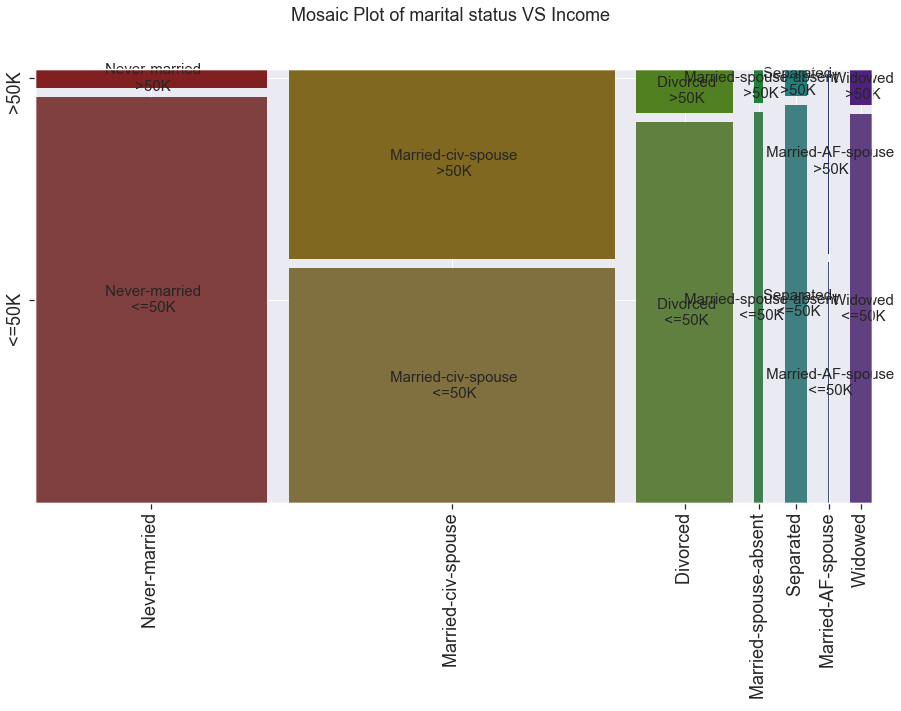

In [50]:
# Mosaic plot of marital status and salary
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
mosaic(adult, ['marital_status', 'Salary_range'], gap=0.03, title='Mosaic Plot of marital status VS Income \n \n', label_rotation=90, ax=ax)
plt.show()

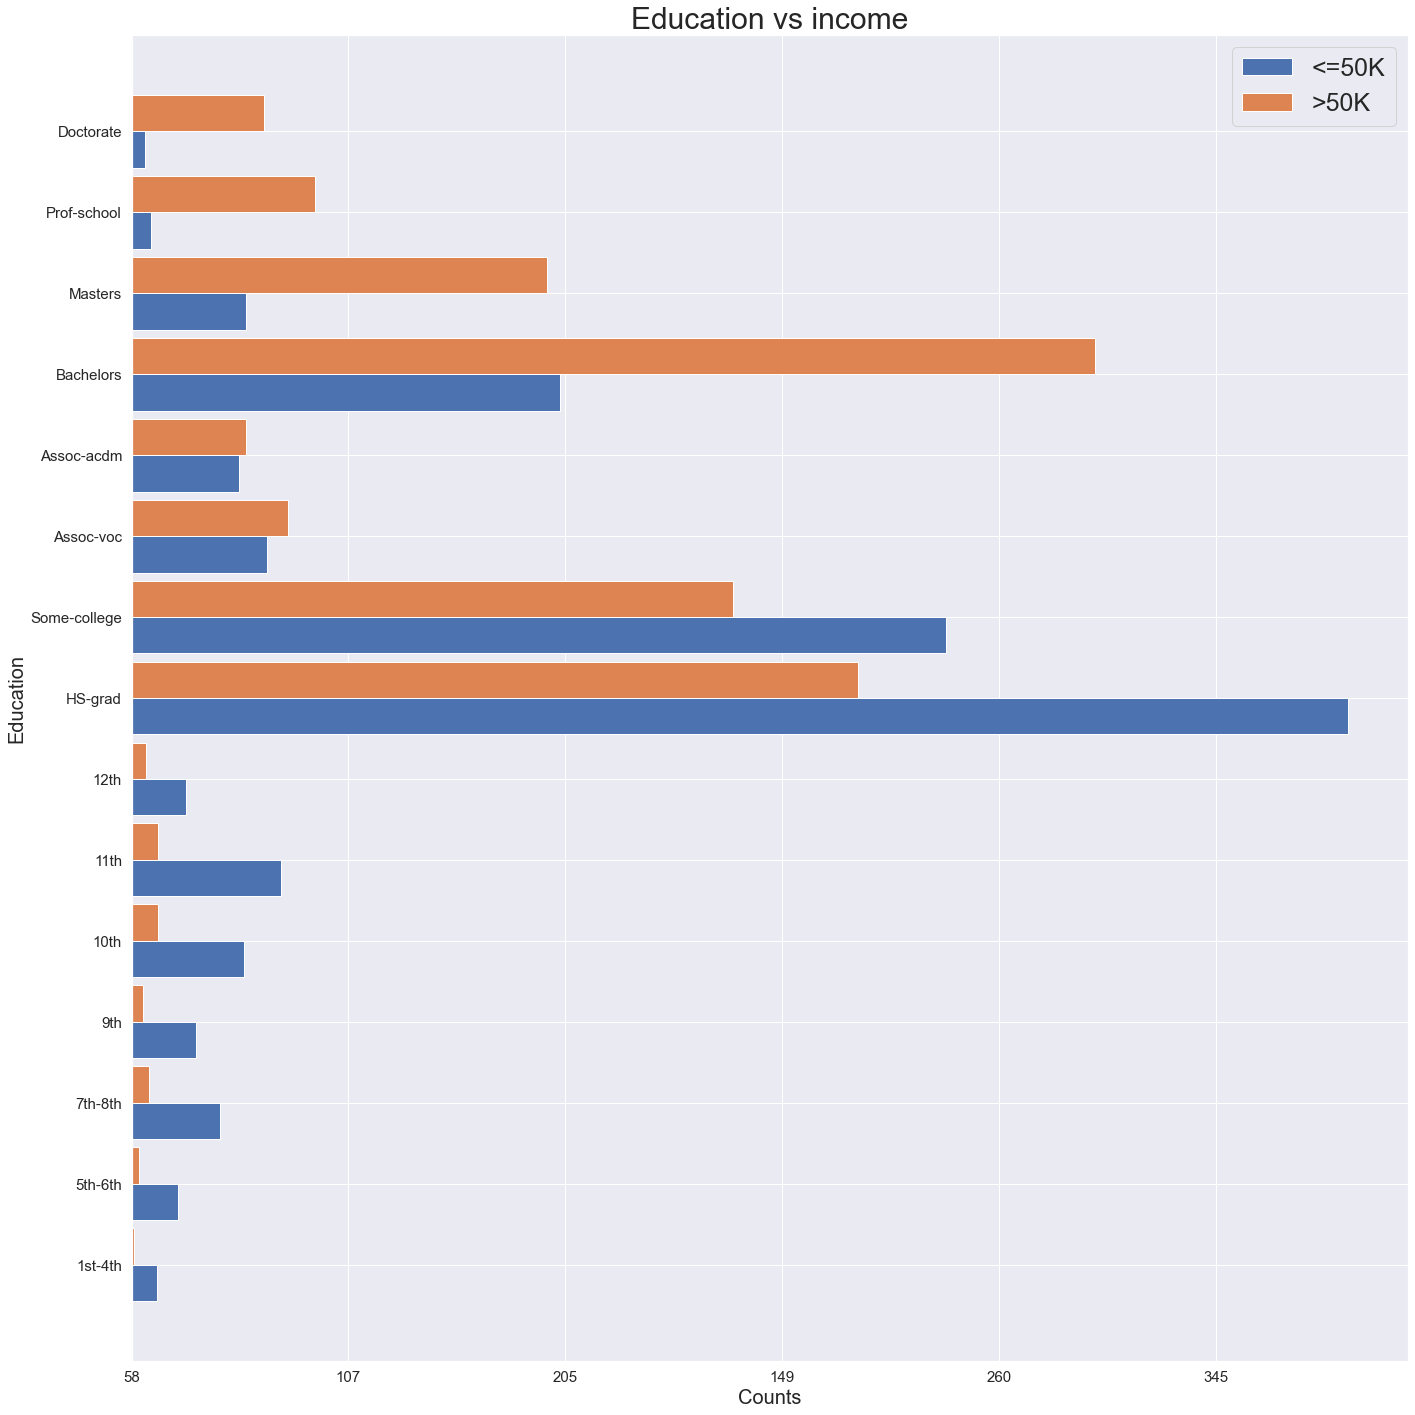

In [51]:
X1 = df_sklearn[df_sklearn["Salary_class"] == 1.0]
X2 = df_sklearn[df_sklearn["Salary_class"] == 0.0].sample(n=len(X1))

highDF = X1.groupby(['education', 'education_num']).size().reset_index(name='counts')
highDF = highDF.astype({'education': str})
highDF = highDF.sort_values(by=['education_num'])

lowDF = X2.groupby(['education', 'education_num']).size().reset_index(name='counts')
lowDF = lowDF.astype({'education': str})
lowDF['education'] = lowDF['education'].str.strip()
indexName = lowDF[lowDF['education'] == 'Preschool'].index
lowDF = lowDF.drop(indexName)
lowDF = lowDF.sort_values(by=['education_num'])

x = np.arange(len(lowDF['education']))
width=0.45
fig, ax = plt.subplots(figsize=(20,20))
rects1 = ax.barh(x-width/2, lowDF['counts'], width, tick_label=lowDF['education'], label='<=50K')
rects2 = ax.barh(x+width/2, highDF['counts'], width, tick_label=highDF['education'], label='>50K')
ax.set_yticks(x)
ax.set_yticklabels(lowDF['education'], fontsize=15)
ax.set_xticklabels(lowDF['counts'], fontsize=15)
ax.legend(fontsize=25)
ax.set_ylabel('Education', fontsize=20)
ax.set_xlabel('Counts', fontsize=20)
plt.title("Education vs income", fontdict={'fontsize':30})

fig.tight_layout()
plt.show()

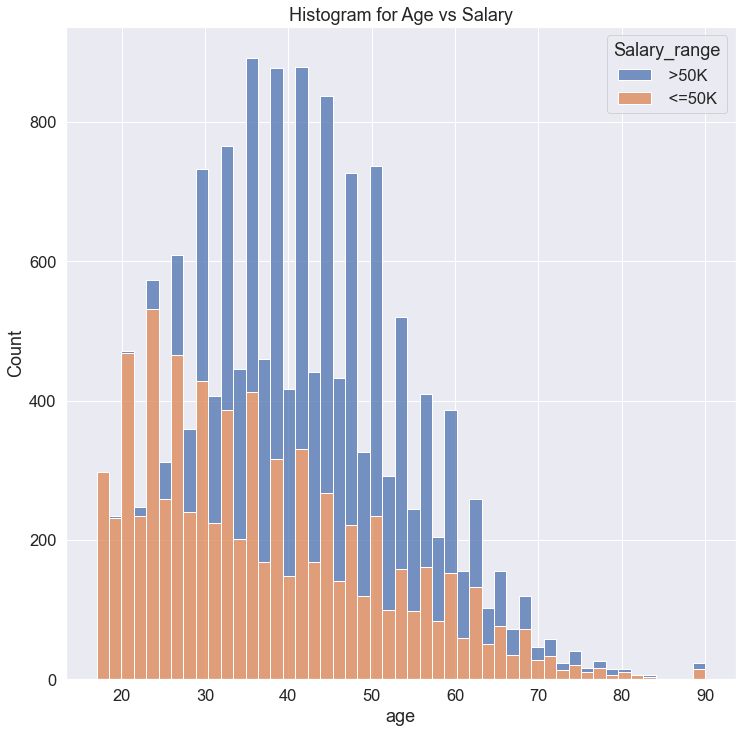

In [52]:
#Histogram for Age vs Salary
h = sns.histplot(data = consolidated_sklearn, x="age", hue="Salary_range", multiple="stack").set_title("Histogram for Age vs Salary")

Text(0.5, 1.08, 'Salary Range Visualization for Age vs Education \n vs Capital Gain vs Marital Status \n vs Hours per week vs Sex')

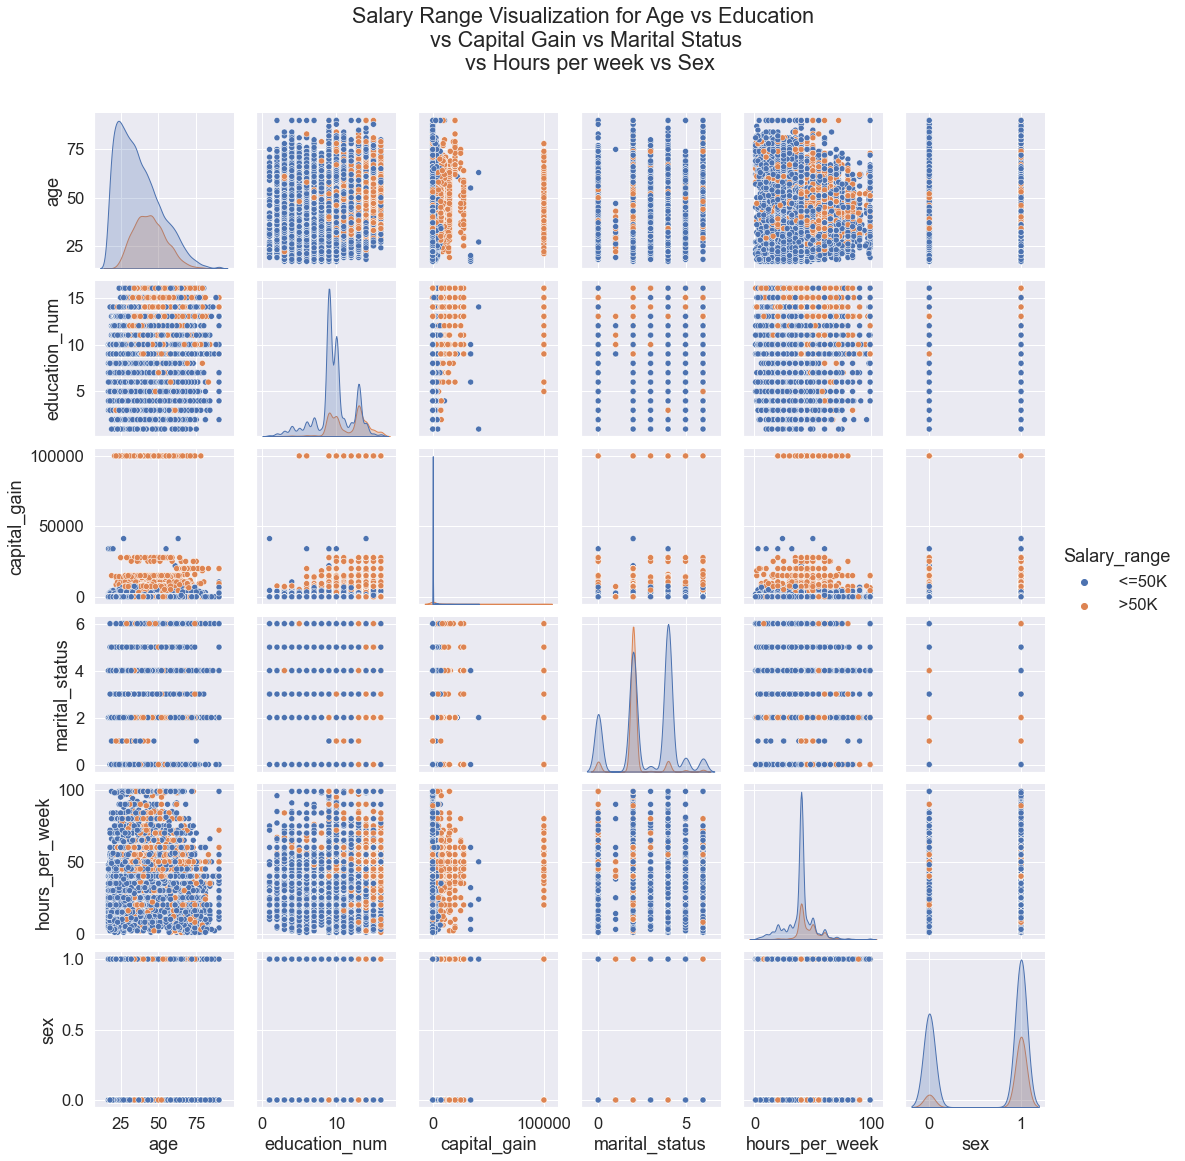

In [53]:
#Pair plot for showing Salary against the combination of all numericals variables
g = sns.pairplot(df_sklearn[["age", "education_num", "capital_gain", "marital_status", "hours_per_week", "sex", "Salary_range"]], hue = "Salary_range")
g.fig.suptitle("Salary Range Visualization for Age vs Education \n vs Capital Gain vs Marital Status \n vs Hours per week vs Sex", y=1.08)